# Odysseus paper charts

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

plt.style.use("plot_styles.mplstyle")

## Figure 1

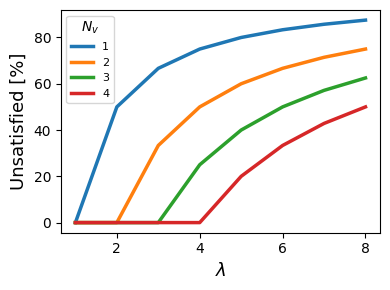

In [2]:
odysseus_sim_path = os.path.join("odysseus/simulator/results", "my_city_0_2X2", "multiple_runs", "scenario_A", "sim_stats.csv")
df = pd.read_csv(odysseus_sim_path)
df["lambda"] = df.requests_rate_factor * 4 # cyclic scenario was originally configured with 4 trips/hour
fig, ax = plt.subplots()
df.set_index("lambda").sort_index().groupby("n_vehicles_sim").percentage_unsatisfied.plot()
ax.set_xlabel(r"$\lambda$")
ax.set_ylabel(r"Unsatisfied [%]")
plt.legend(title=r"$N_{v}$")
plt.tight_layout()
plt.savefig("paper_figures/figure_1.pdf")
plt.show()
plt.close()

## Figure 2

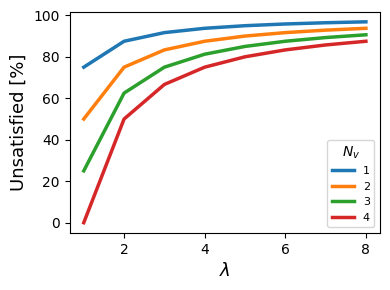

In [3]:
odysseus_sim_path = os.path.join("odysseus/simulator/results", "my_city_0_2X2", "multiple_runs", "scenario_B", "sim_stats.csv")
df = pd.read_csv(odysseus_sim_path)
df["lambda"] = df.requests_rate_factor
fig, ax = plt.subplots()
df.set_index("lambda").sort_index().groupby("n_vehicles_sim").percentage_unsatisfied.plot()
ax.set_xlabel(r"$\lambda$")
ax.set_ylabel(r"Unsatisfied [%]")
plt.legend(title=r"$N_{v}$")
plt.tight_layout()
plt.savefig("paper_figures/figure_2.pdf")
plt.show()
plt.close()

## Figure 3

In [4]:
odysseus_sim_path = os.path.join("odysseus/simulator/results", "my_city_1_1X5", "multiple_runs", "scenario_B1", "sim_stats.csv")
df = pd.read_csv(odysseus_sim_path)
df.charging_duration = df.charging_duration / 3600
df["n_charges_per_100_bookings"] = df.n_charges / df.n_bookings * 100

In [5]:
df = df[df.charging_duration == 6]

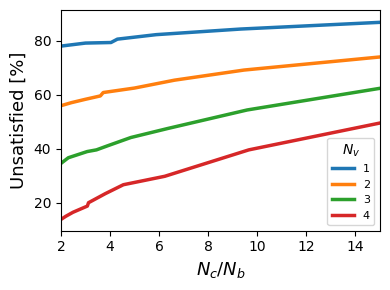

In [6]:
fig, ax = plt.subplots()
df.set_index("n_charges_per_100_bookings").sort_index().groupby("n_vehicles_sim").percentage_unsatisfied.plot()
ax.set_xlabel(r"$N_{c}/N_{b}$")
ax.set_ylabel(r"Unsatisfied [%]")
plt.legend(title=r"$N_{v}$")
ax.set_xlim(2, 15)
plt.tight_layout()
plt.savefig("paper_figures/figure_3.pdf")
plt.show()
plt.close()

## Figure 4
### Number of simulated booking requests per second

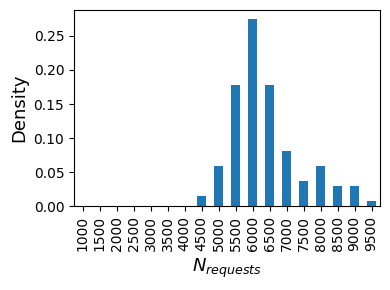

In [7]:
df = pd.read_csv("odysseus/simulator/results/Torino/multiple_runs/scenario_C/sim_stats.csv")
df["n_booking_reqs_per_sec"] = df.n_booking_reqs / df.sim_exec_time_sec
df_value_counts = df["n_booking_reqs_per_sec"].value_counts(
    normalize=True, bins=[round(int(b)) for b in list(range(1000, 10000, 500))]
).sort_index()
df_value_counts = pd.DataFrame(
    df_value_counts, index=[round(int(b)) for b in list(range(1000, 10000, 500))]
)
fig, ax = plt.subplots()
df_value_counts.sort_index().plot.bar(ax=ax)
plt.xlabel(r"$N_{requests}$")
plt.ylabel(r"Density")
ax.get_legend().remove()
plt.tight_layout()
plt.savefig("paper_figures/figure_4.pdf")
plt.show()
plt.close()

## Figure 5
### Number of simulated bookings (charging included) per second


In [8]:
df["n_bookings_per_sec"] = df.n_bookings / df.sim_exec_time_sec
df_value_counts = df["n_bookings_per_sec"].value_counts(
    normalize=True,
    bins=[round(int(b)) for b in list(range(1000, 10000, 500))]
).sort_index()
df_value_counts = pd.DataFrame(
    df_value_counts,
    index=[round(int(b)) for b in list(range(1000, 10000, 500))]
)

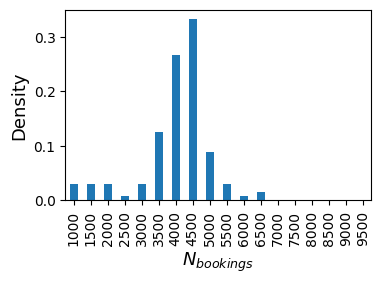

In [9]:
fig, ax = plt.subplots()
df_value_counts.sort_index().plot.bar(ax=ax)
plt.tight_layout()
plt.savefig("paper_figures/figure_5.pdf")
plt.xlabel(r"$N_{bookings}$")
plt.ylabel(r"Density")
ax.get_legend().remove()
plt.tight_layout()
plt.savefig("paper_figures/figure_5.pdf")
plt.show()
plt.close()

## Figure 6
### Percentage of unsatisfied requests w.r.t. number of charging poles with different number of charging zones


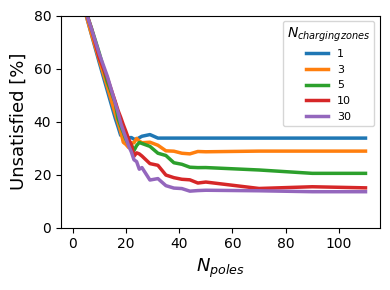

In [10]:
df = pd.read_csv("odysseus/simulator/results/Torino/multiple_runs/scenario_C/sim_stats.csv")[[
    "n_charging_zones", "tot_n_charging_poles", "percentage_unsatisfied",
    "charging_return_strategy",
    "charging_relocation_strategy"
]]
fig, ax = plt.subplots()
df[
    (df.charging_return_strategy == "no_return") & (
        df.charging_relocation_strategy == "closest_free"
    )
].set_index("tot_n_charging_poles").sort_index().groupby("n_charging_zones").percentage_unsatisfied.plot()
ax.set_xlabel(r"$N_{poles}$")
ax.set_ylabel(r"Unsatisfied [%]")
plt.legend(title=r"$N_{charging zones}$")
#ax.set_xlim(0, 30)
ax.set_ylim(0, 80)
plt.tight_layout()
plt.savefig("paper_figures/figure_6.pdf")
plt.show()
plt.close()

## Figure 7
### Number of total and unsatisfied requests in a typical week within the simulation


In [11]:
import calendar
def get_weekday_string_from_int(i):
    return list(calendar.day_abbr)[i]

In [ ]:
df = pd.read_csv(
    "odysseus/simulator/results/Torino/single_run/scenario_C/0_0_0/sim_booking_requests.csv"
)[[
    "start_time", "n_vehicles_booked"
]]
df.start_time = pd.to_datetime(df.start_time)
n_reqs_resampled = df.set_index("start_time").resample("30Min").count().iloc[:, 0].loc[
       "2017-11-20": "2017-11-26"
]
df = pd.read_csv(
    "odysseus/simulator/results/Torino/single_run/scenario_C/0_0_0/sim_unsatisfied_requests.csv"
)
df.start_time = pd.to_datetime(df.start_time)
n_unsatisfied_resampled = df.set_index("start_time").resample("30Min").count().iloc[:, 0].loc[
      "2017-11-20": "2017-11-26"
]
n_reqs_resampled.plot(label="requests")
n_unsatisfied_resampled.plot(label="unsatisfied")
plt.legend()
plt.tight_layout()
plt.xticks(
    pd.Series(n_reqs_resampled.index.values).dt.date.unique(),
    [get_weekday_string_from_int(i) for i in range(7)]
)
plt.savefig("paper_figures/figure_7.pdf")
plt.show()
plt.close()

## Figure 8
### Total number of unsatisfied requests, heatmap normalised w.r.t. max unsatisfied requests in a zone
#### Max zone count = 1, every other zone count between 0 and 1

In [ ]:
df = pd.read_csv("odysseus/simulator/results/Torino/single_run/scenario_C/0_0_0/sim_booking_requests.csv")
avg_origins_by_zone = df.groupby(
    ["origin_id", "hour"], as_index=False
).count().iloc[:, :3].groupby("origin_id")["Unnamed: 0"].mean()
grid = gpd.read_file("odysseus/simulator/results/Torino/single_run/scenario_C/0_0_0/grid.dbf")
grid.unsatisfie = (grid.unsatisfie / grid.unsatisfie.max())
grid.loc[533, "unsatisfie"] = 0
grid[grid.unsatisfie >= 0].plot(
    column="unsatisfie", legend=True, cmap="jet",
    legend_kwds={'ticks': [0, 0.2, 0.4, 0.6, 0.8, 1]}
)
plt.xticks([])
plt.yticks([])
plt.ylim(45.01, 45.125)
plt.tight_layout()
plt.savefig("paper_figures/figure_8.pdf")
plt.show()
plt.close()

## Figure 9
### Average number of available vehicles, heatmap normalised w.r.t. max unsatisfied requests in a zone
#### Max zone count = 1, every other zone count between 0 and 1

In [ ]:
df = pd.read_csv("odysseus/simulator/results/Torino/single_run/scenario_C/0_0_0/zones_history.csv")
df["hour"] = pd.to_datetime(df.t).dt.hour
avg_n_vehicles_by_zone = df.groupby(
    ["zone_id"], as_index=False
).vehicles_parked.max().vehicles_parked
grid["avg_n_vehicles_by_zone"] = avg_n_vehicles_by_zone.replace({0: np.NAN})
grid.loc[533, "avg_n_vehicles_by_zone"] = 0
grid.avg_n_vehicles_by_zone = (grid.avg_n_vehicles_by_zone / grid.avg_n_vehicles_by_zone.max())
grid.plot(
    column="avg_n_vehicles_by_zone", legend=True, cmap="jet",
    # legend_kwds={'ticks': [0, 0.2, 0.4, 0.6, 0.8, 1]}
)
plt.xticks([])
plt.yticks([])
plt.ylim(45.01, 45.125)
plt.tight_layout()
plt.savefig("paper_figures/figure_9.pdf")
plt.show()
plt.close()

## E-Scooters

In [ ]:
df = pd.read_csv("odysseus/simulator/results/Louisville/multiple_runs/scenario_D/sim_stats.csv")[[
    "n_vehicles_sim", "relocation", "percentage_unsatisfied",
]]
fig, ax = plt.subplots()
df[df.relocation].set_index("n_vehicles_sim").sort_index().percentage_unsatisfied.plot(label="with relo")
df[~df.relocation].set_index("n_vehicles_sim").sort_index().percentage_unsatisfied.plot(label="no relo")
ax.set_xlabel(r"$N_{vehicles}$")
ax.set_ylabel(r"Unsatisfied [%]")
#ax.set_xlim(0, 30)
ax.set_ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.savefig("paper_figures/figure_X.pdf")
plt.show()
plt.close()

In [ ]:
df = pd.read_csv("odysseus/simulator/results/Louisville/multiple_runs/scenario_D/sim_stats.csv")
all_columns = df.columns
all_columns

In [ ]:
df = pd.read_csv(
    "odysseus/simulator/results/Louisville/single_run/scenario_D/0_0_0/sim_booking_requests.csv"
)[[
    "start_time", "n_vehicles_booked"
]]
df.start_time = pd.to_datetime(df.start_time)
n_reqs_resampled = df.set_index("start_time").resample("1D").count().iloc[:, 0]
print(n_reqs_resampled.sum())
df = pd.read_csv(
    "odysseus/simulator/results/Louisville/single_run/scenario_D/0_0_0/sim_bookings.csv"
)
df.start_time = pd.to_datetime(df.start_time)
n_unsatisfied_resampled = df.set_index("start_time").resample("1D").count().iloc[:, 0]
print(n_unsatisfied_resampled.sum())

df = pd.read_csv(
    "odysseus/simulator/results/Louisville/single_run/scenario_D/0_0_1/sim_bookings.csv"
)
df.start_time = pd.to_datetime(df.start_time)
n_unsatisfied_resampled_relo = df.set_index("start_time").resample("1D").count().iloc[:, 0]
print(n_unsatisfied_resampled_relo.sum())

n_reqs_resampled.plot(label="requests")
n_unsatisfied_resampled.plot(label="no_relo")
n_unsatisfied_resampled_relo.plot(label="with_relo")
plt.ylim(0, 2000)
plt.legend(ncol=3)
plt.tight_layout()
#plt.xticks(
#    pd.Series(n_reqs_resampled.index.values).dt.date.unique(),
#    [get_weekday_string_from_int(i) for i in range(7)]
#)
plt.savefig("paper_figures/figure_XXX.pdf")
plt.show()
plt.close()

In [ ]:
from ast import literal_eval

In [ ]:
grid = gpd.read_file("odysseus/simulator/results/Louisville/single_run/scenario_D/0_0_0/grid.dbf")
grid.unsatisfie = (grid.unsatisfie / grid.unsatisfie.max())

grid2 = gpd.read_file("odysseus/simulator/results/Louisville/single_run/scenario_D/0_0_1/grid.dbf")
grid2.unsatisfie = (grid2.unsatisfie / grid2.unsatisfie.max())

grid["unsat_delta"] = grid.unsatisfie - grid2.unsatisfie

In [ ]:
grid[grid.unsatisfie >= 0].plot(
    column="unsat_delta", legend=True, cmap="seismic", vmin=-0.15, vmax=0.15,
    legend_kwds={'ticks': [-0.15, 0, 0.15]}
)
plt.xticks([])
plt.yticks([])
# plt.ylim(45.01, 45.125)
plt.tight_layout()
plt.savefig("paper_figures/figure_XXXX.pdf")
plt.show()
plt.close()

In [ ]:
df = pd.read_csv(
    "odysseus/simulator/results/Louisville/single_run/scenario_D/0_0_1/relocation_history.csv"
)

In [ ]:
df.start_zone_ids = df.start_zone_ids.apply(lambda x: literal_eval(x))
df.end_zone_ids = df.end_zone_ids.apply(lambda x: literal_eval(x))
df = df.explode(["start_zone_ids"]).explode(["end_zone_ids"])

In [ ]:
grid["relostart"] = df.end_zone_ids.value_counts()
# grid.relostart = (grid.relostart / grid.relostart.max())
# grid.loc[533, "unsatisfie"] = 0
grid[grid.relostart >= 0].plot(
    column="relostart", legend=True, cmap="jet",
    # legend_kwds={'ticks': [0, 0.2, 0.4, 0.6, 0.8, 1]}
)
plt.xticks([])
plt.yticks([])
# plt.ylim(45.01, 45.125)
plt.tight_layout()
plt.savefig("paper_figures/figure_XXXXX.pdf")
plt.show()
plt.close()

In [ ]:
df = pd.read_csv(
    "odysseus/simulator/results/Louisville/single_run/scenario_D/0_0_1/relocation_history_zones.csv"
)

In [ ]:
df[df.operation_type == "pickup"][df.n_vehicles > 0].n_vehicles.value_counts().sort_index().plot.bar()

In [ ]:
df[df.operation_type == "dropoff"][df.n_vehicles > 0].n_vehicles.value_counts().sort_index().plot.bar()

In [ ]:
df[df.operation_type == "pickup"][df.n_vehicles > 0].n_vehicles.sum()

In [ ]:
df[df.operation_type == "dropoff"][df.n_vehicles > 0].n_vehicles.sum()

In [ ]:
df[df.n_vehicles > 0][df.operation_type == "pickup"].groupby("zone_start").count().iloc[:, 0].sum()

In [ ]:
df[df.n_vehicles > 0][df.operation_type == "pickup"].groupby("zone_end").count().iloc[:, 0].sum()

In [ ]:
df[df.n_vehicles > 0][df.operation_type == "dropoff"].groupby("zone_start").count().iloc[:, 0].sum()

In [ ]:
df[df.n_vehicles > 0][df.operation_type == "dropoff"].groupby("zone_end").count().iloc[:, 0].sum()

In [ ]:
grid2["n_pickup_events"] = df[df.n_vehicles > 0][df.operation_type == "pickup"].groupby("zone_start").count().iloc[:, 0]
grid2.plot(
    column="n_pickup_events", legend=True, cmap="jet",
    # legend_kwds={'ticks': [0, 0.2, 0.4, 0.6, 0.8, 1]}
)
plt.xticks([])
plt.yticks([])
# plt.ylim(45.01, 45.125)
plt.tight_layout()
plt.savefig("paper_figures/figure_XXXXX.pdf")
plt.show()
plt.close()

In [ ]:
grid2["n_pickup_events"] = df[df.n_vehicles > 0][df.operation_type == "pickup"].groupby("zone_end").count().iloc[:, 0]
grid2.plot(
    column="n_pickup_events", legend=True, cmap="jet",
    # legend_kwds={'ticks': [0, 0.2, 0.4, 0.6, 0.8, 1]}
)
plt.xticks([])
plt.yticks([])
# plt.ylim(45.01, 45.125)
plt.tight_layout()
plt.savefig("paper_figures/figure_XXXXX.pdf")
plt.show()
plt.close()

In [ ]:
grid2["n_dropoff_events"] = df[df.n_vehicles > 0][df.operation_type == "dropoff"].groupby("zone_start").count().iloc[:, 0]
grid2.plot(
    column="n_dropoff_events", legend=True, cmap="jet",
    # legend_kwds={'ticks': [0, 0.2, 0.4, 0.6, 0.8, 1]}
)
plt.xticks([])
plt.yticks([])
# plt.ylim(45.01, 45.125)
plt.tight_layout()
plt.savefig("paper_figures/figure_XXXXX.pdf")
plt.show()
plt.close()

In [ ]:
grid2["n_dropoff_events"] = df[df.n_vehicles > 0][df.operation_type == "dropoff"].groupby("zone_end").count().iloc[:, 0]
grid2.plot(
    column="n_dropoff_events", legend=True, cmap="jet",
    # legend_kwds={'ticks': [0, 0.2, 0.4, 0.6, 0.8, 1]}
)
plt.xticks([])
plt.yticks([])
# plt.ylim(45.01, 45.125)
plt.tight_layout()
plt.savefig("paper_figures/figure_XXXXX.pdf")
plt.show()
plt.close()